# **NETFLIX**: Data Analysis

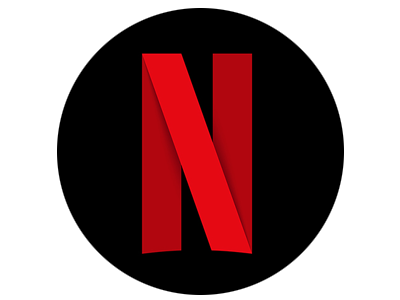


Content Based 
=> who is your target, how much do you know about your target

**IMPORTING LIBRARIES NEEDED**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1) DATA COLLECTION:**
**Loading dataset**: Here we have taken netflix original dataset from kaggle. 

In [ ]:
df=pd.read_csv("/content/drive/My Drive/bda/netflix_titles.csv")

***The dataset has 12 fields, the dataset comprises of both tv shows and movies***

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**2) FEATURE ENGINEERING**: 






In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Only records having null values will have a different colour**

Here data from **director>cast>country>**rating is missing


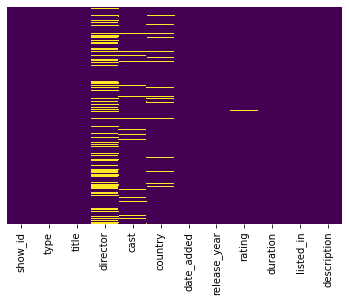

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df[df['cast'].isnull()].tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7647,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,"May 31, 2017",2011,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...
7653,s7654,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
7658,s7659,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
7661,s7662,TV Show,Word Party Songs,NaN,NaN,United States,"August 7, 2020",2020,TV-Y,1 Season,Kids' TV,"Sing along and dance with Bailey, Franny, Kip,..."
7670,s7671,TV Show,World's Most Wanted,NaN,NaN,United States,"August 5, 2020",2020,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","Suspected of heinous crimes, they’ve avoided c..."
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
dd1=df[['director','cast','country']][df.director.isnull()]
dd1.head(5)

,director,cast,country
0,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
11,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States"
16,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN
19,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom
24,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan


In [ ]:
fig = plt.figure(figsize = (200, 200))

ax = sns.countplot(x='country',data=dd1, palette="Set2")


In [ ]:
dd1

,director,cast,country
0,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
11,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States"
16,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN
19,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom
24,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan
...,...,...,...
7775,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan
7777,NaN,NaN,NaN
7779,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico
7784,NaN,Nasty C,NaN


In [ ]:
df[df['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [ ]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [ ]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['director'].unique

<bound method Series.unique of 0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object>

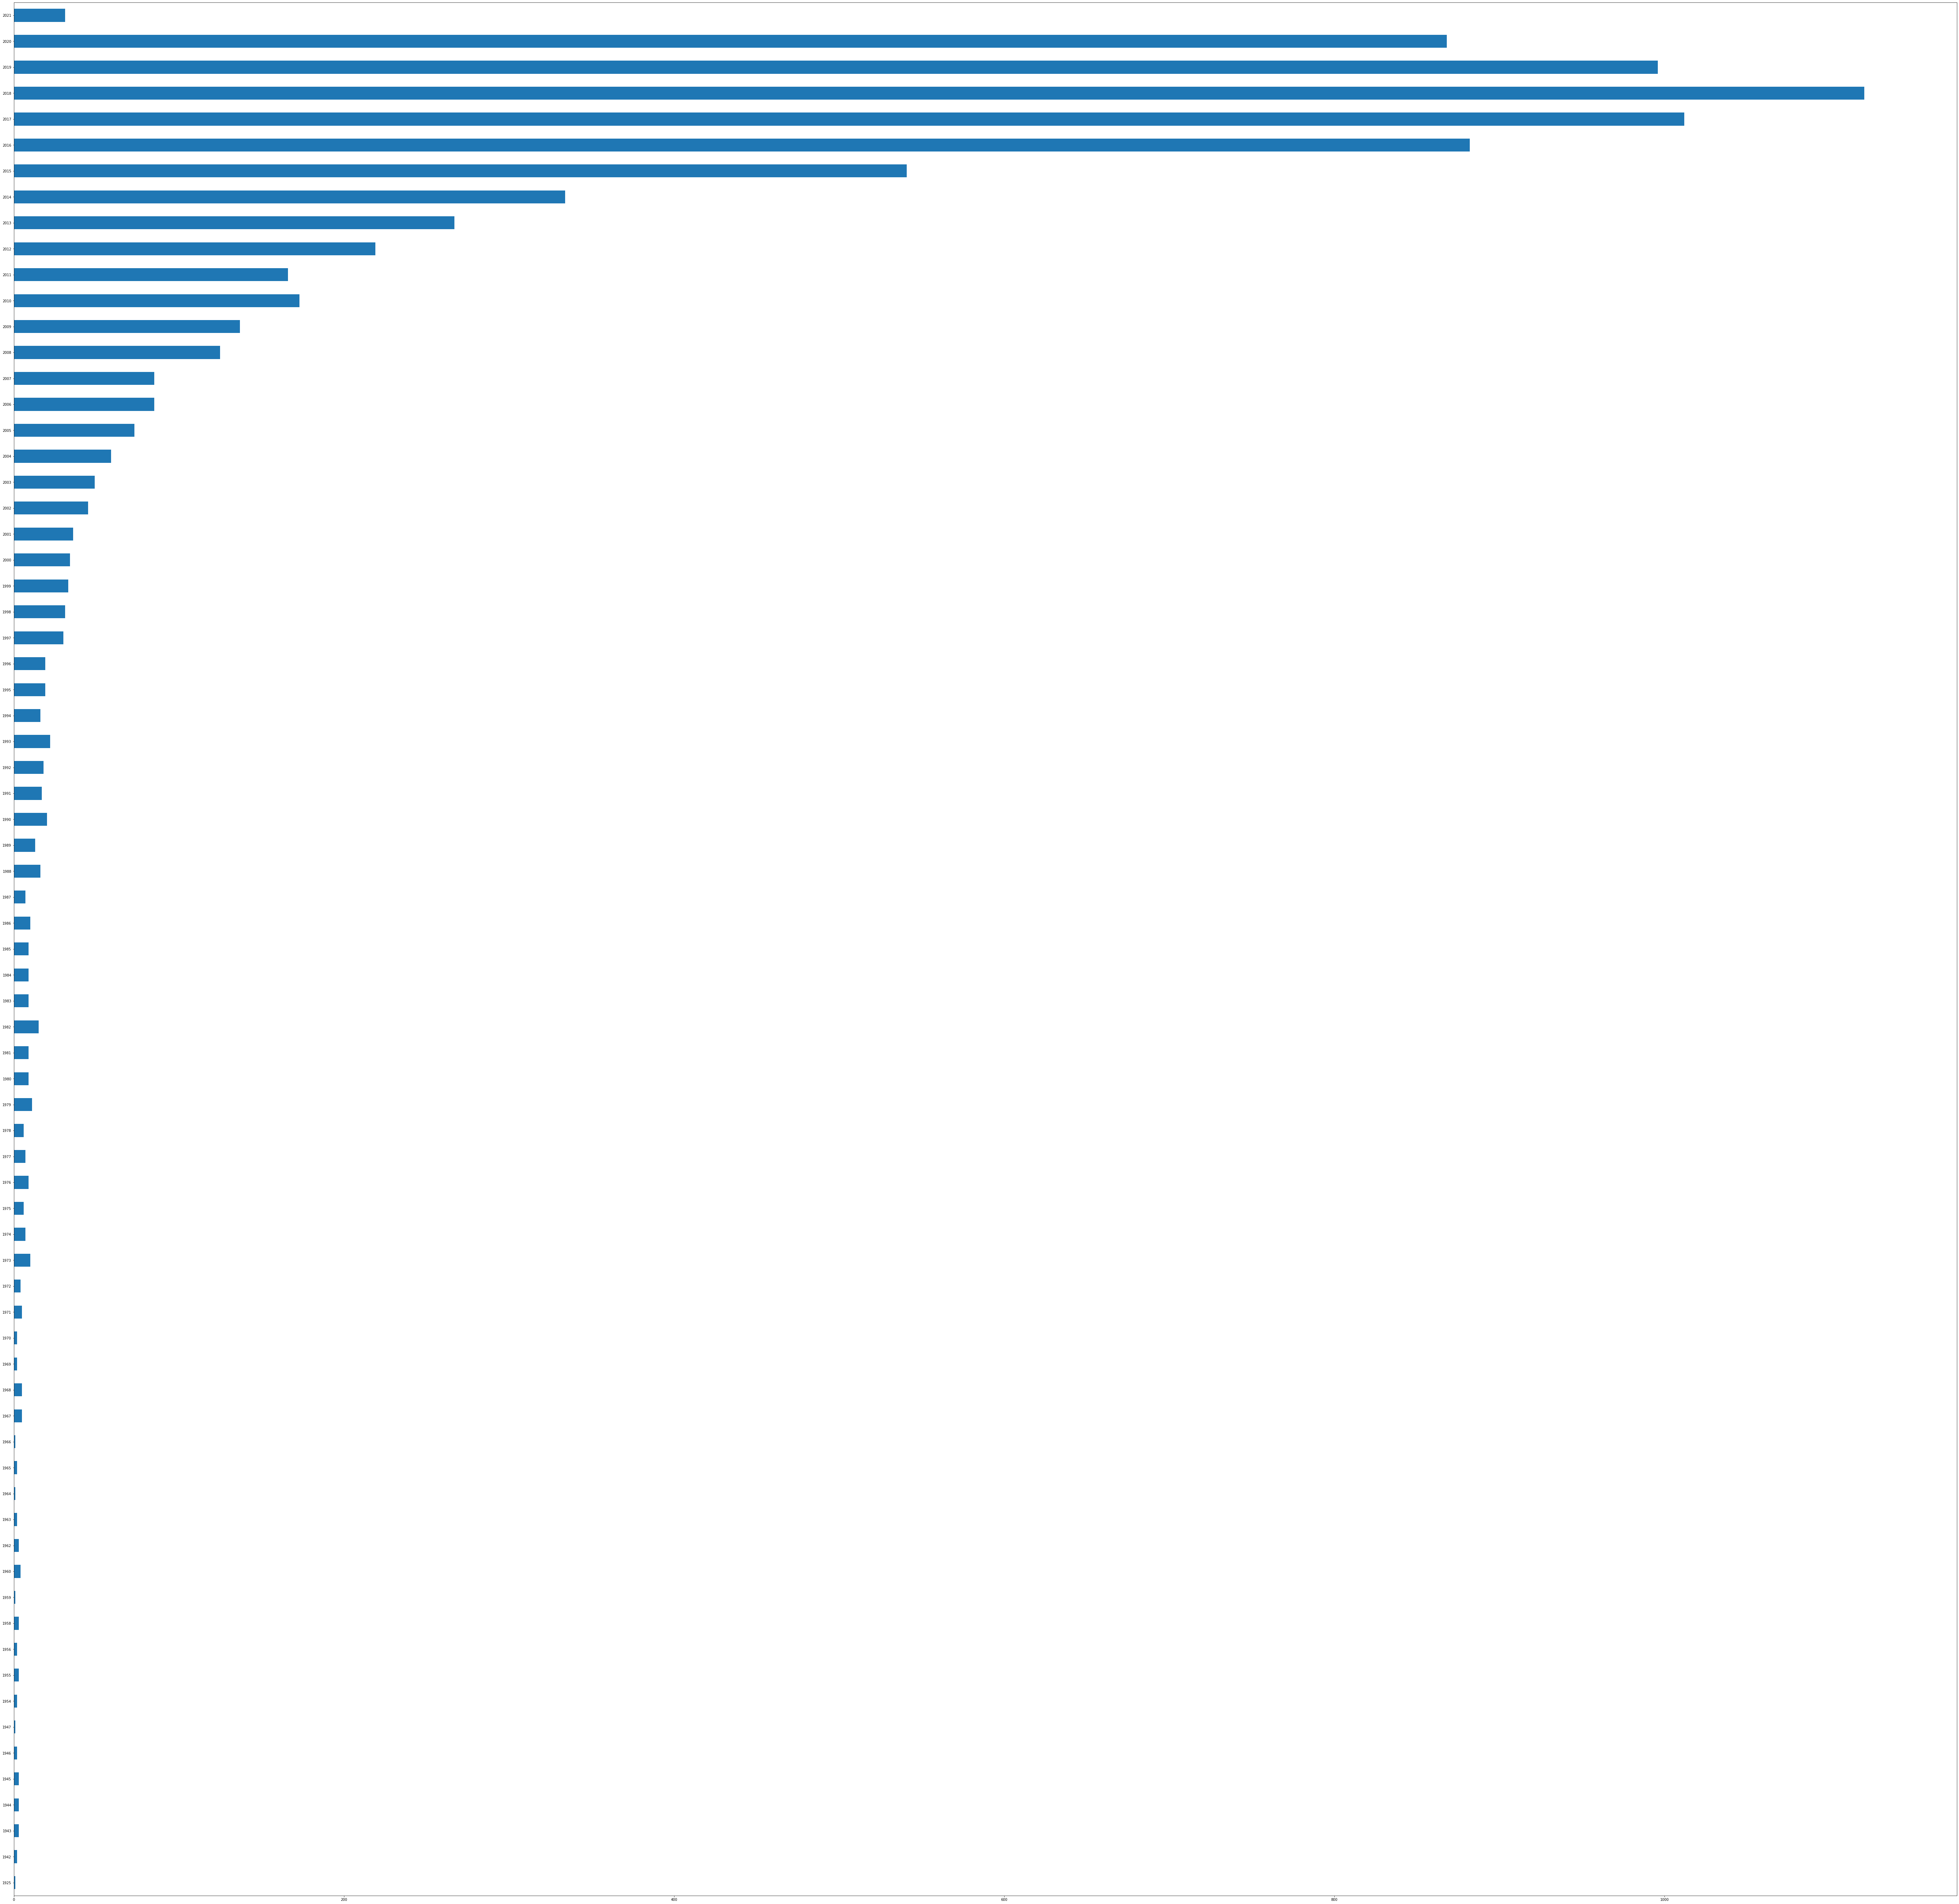

In [ ]:

fig=df['release_year'].value_counts().sort_index().plot.barh(figsize=(100,100))


In [ ]:
c1=0
c2=0
list1=[]
list2=[]
for i in df['type']:
  if i=='TV Show':
    c1+=1
    list1.append(i)
  elif i=='Movie':
    c2+=1
    list2.append(i)
print(c1,c2)


2410 5377


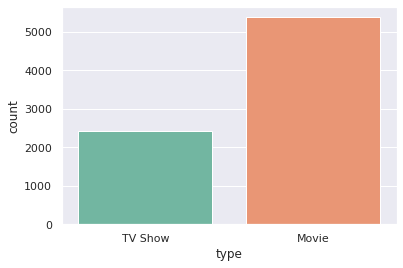

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")



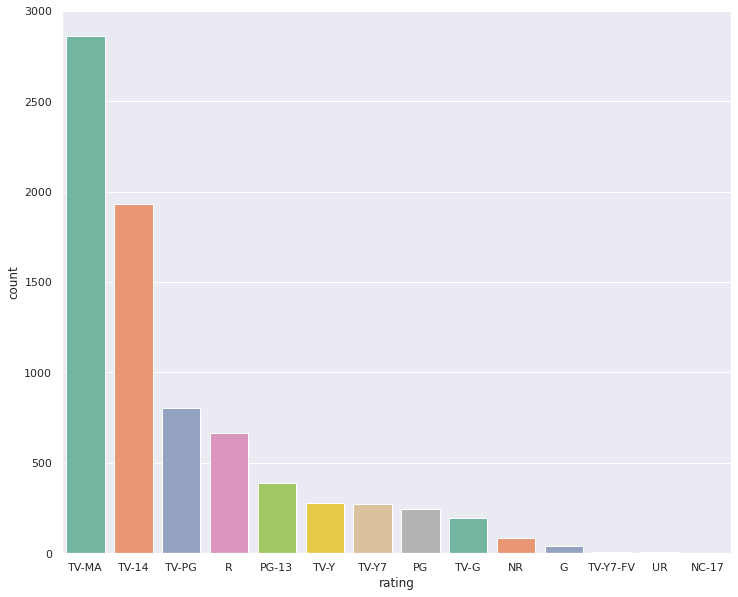

In [ ]:


plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])



**Television content rating system**:are systems for evaluating the content and reporting the suitability of television programs for children, teenagers, or adults. Many countries have their own television rating system and countries' rating processes vary by local priorities. Programs are rated by the organization that manages the system, the broadcaster, or the content producers. 

***TV-MA – TV Mature Audience*** Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. Content Ratings Content Ratings are shown just below the program rating.

**TV-14**. This program may be unsuitable for children under 14 years of age.  Programs rated TV-14 contain material that parents or adult guardians may find unsuitable for children under the age of 14.

In [ ]:
df.groupby('rating').release_year.value_counts()

rating    release_year
G         2004            3
          2009            3
          2016            3
          1971            2
          1999            2
                         ..
TV-Y7-FV  2018            1
UR        2007            2
          1974            1
          2008            1
          2016            1
Name: release_year, Length: 433, dtype: int64

In [ ]:
df.groupby('rating').duration.value_counts()

rating    duration
G         78 min      7
          75 min      3
          100 min     2
          79 min      2
          84 min      2
                     ..
TV-Y7-FV  78 min      1
UR        103 min     2
          113 min     1
          116 min     1
          99 min      1
Name: duration, Length: 975, dtype: int64

In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7787, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imdb ratings**

In [ ]:

df1=pd.read_csv('/content/drive/My Drive/bda/IMDb_ratings.csv',usecols=['weighted_average_vote'])

In [ ]:
df_c=pd.read_csv('/content/drive/My Drive/bda/IMDb_ratings.csv')
df_c.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
df1

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0
...,...
85850,5.3
85851,7.7
85852,7.9
85853,6.4


### **The weighted average takes into account the relative importance or frequency of some factors in a data set.**
### **A weighted average is sometimes more accurate than a simple average.**


In [ ]:
import pandas as pd
# df2=pd.read_csv('/content/drive/My Drive/bda/IMDb movies.csv')
df2=pd.read_csv('/content/IMDb movies.csv')
df2.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0


In [ ]:
!pip install plotly==4.5.2

# **top 10 netflix movies**

In [ ]:
import plotly.express as px
top_rated=df2[0:10]
fig =px.sunburst(top_rated,path=['title','country'],values='avg_vote',color='avg_vote')
fig.show()

In [ ]:
df2[['title','year','genre','director','actors','country']]


,title,year,genre,director,actors,country
0,Miss Jerry,1894,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",USA
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Australia
2,Den sorte drøm,1911,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...","Germany, Denmark"
3,Cleopatra,1912,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",USA
4,L'Inferno,1911,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Italy
...,...,...,...,...,...,...
85850,Le lion,2020,Comedy,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...","France, Belgium"
85851,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",Netherlands
85852,Padmavyuhathile Abhimanyu,2019,Drama,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",India
85853,Sokagin Çocuklari,2019,"Drama, Family",Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",Turkey


In [ ]:
new_dataframe=pd.DataFrame({'Title':df2['title'],'release_year':df2['year'],'rating':df1['weighted_average_vote'],'genre':df2['genre'],'director_filler':df2['director'],'cast_filler':df2['actors'],'country_filler':df2['country']})

In [ ]:
new_dataframe.drop_duplicates(subset=['Title','release_year','rating','country_filler','director_filler','cast_filler'],inplace=True)

In [ ]:
new_dataframe

,Title,release_year,rating,genre,director_filler,cast_filler,country_filler
0,Miss Jerry,1894,5.9,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",USA
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Australia
2,Den sorte drøm,1911,5.8,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...","Germany, Denmark"
3,Cleopatra,1912,5.2,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",USA
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Italy
...,...,...,...,...,...,...,...
85850,Le lion,2020,5.3,Comedy,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...","France, Belgium"
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama",Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",Netherlands
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",India
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family",Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",Turkey


In [ ]:
new_dataframe1=new_dataframe.dropna()

In [ ]:
new_dataframe1

,Title,release_year,rating,genre,director_filler,cast_filler,country_filler
0,Miss Jerry,1894,5.9,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",USA
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",Australia
2,Den sorte drøm,1911,5.8,Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...","Germany, Denmark"
3,Cleopatra,1912,5.2,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",USA
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Italy
...,...,...,...,...,...,...,...
85850,Le lion,2020,5.3,Comedy,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...","France, Belgium"
85851,De Beentjes van Sint-Hildegard,2020,7.7,"Comedy, Drama",Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",Netherlands
85852,Padmavyuhathile Abhimanyu,2019,7.9,Drama,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",India
85853,Sokagin Çocuklari,2019,6.4,"Drama, Family",Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",Turkey


**Inner Merge / Inner join – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.**

In [ ]:
merged_dataset=new_dataframe1.merge(df,left_on='Title',right_on='title',how='inner')

In [ ]:

merged_dataset.head(5)

,Title,release_year_x,rating_x,genre,director_filler,cast_filler,country_filler,show_id,type,title,director,cast,country,date_added,release_year_y,rating_y,duration,listed_in,description
0,Sherlock Holmes,1916,6.4,Mystery,Arthur Berthelet,"William Gillette, Marjorie Kay, Ernest Maupain...",USA,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
1,Sherlock Holmes,1922,5.8,"Drama, Mystery",Albert Parker,"John Barrymore, Roland Young, Carol Dempster, ...",USA,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
2,Sherlock Holmes,1932,5.7,Drama,William K. Howard,"Clive Brook, Miriam Jordan, Ernest Torrence, H...",USA,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
3,Sherlock Holmes,1937,7.1,"Comedy, Crime, Romance",Karl Hartl,"Hans Albers, Heinz Rühmann, Marieluise Claudiu...",Germany,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
4,Sherlock Holmes,2009,7.6,"Action, Adventure, Mystery",Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","USA, Germany, UK, Australia",s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...


In [ ]:
merged_dataset.columns

Index(['Title', 'release_year_x', 'rating_x', 'genre', 'director_filler',
       'cast_filler', 'country_filler', 'show_id', 'type', 'title', 'director',
       'cast', 'country', 'date_added', 'release_year_y', 'rating_y',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
merged_dataset.shape

(2730, 19)

In [ ]:
merged_dataset.sort_values(by='rating_x',ascending=False)

,Title,release_year_x,rating_x,genre,director_filler,cast_filler,country_filler,show_id,type,title,director,cast,country,date_added,release_year_y,rating_y,duration,listed_in,description
989,Innocent,2017,9.0,Comedy,Marc-André Lavoie,"Dorothée Berryman, Bobby Beshro, Emmanuel Bilo...",Canada,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
398,Pulp Fiction,1994,8.9,"Crime, Drama",Quentin Tarantino,"Tim Roth, Amanda Plummer, Laura Lovelace, John...",USA,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
380,Schindler's List,1993,8.9,"Biography, Drama, History",Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",USA,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1296,Inception,2010,8.8,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","USA, UK",s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."
1104,Oththa Seruppu Size 7,2019,8.6,Drama,Parthiban,"Parthiban, Gayathrie, Deepa Venkat",India,s4691,Movie,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,End Game,2009,1.9,Drama,Bruce Koehler,"Kurt Angle, Jenna Morasca, Natalie Bail, Eric ...",USA,s2002,Movie,End Game,"Rob Epstein, Jeffrey Friedman",NaN,United States,"May 4, 2018",2018,TV-PG,40 min,Documentaries,"Facing an inevitable outcome, terminally ill p..."
582,Himmatwala,2013,1.7,"Action, Comedy",Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Ma...",India,s2744,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...
1200,Pink,2016,1.6,"Comedy, Drama",Paco del Toro,"Pablo Cheng, Charly López, Roberto Palazuelos",Mexico,s4863,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,"January 20, 2017",2016,TV-14,130 min,"Dramas, International Movies","A sexual assault victim, unjustly tried for th..."
2185,Aerials,2016,1.6,"Drama, Sci-Fi, Thriller",S.A. Zaidi,"Saga Alyasery, Ana Druzhynina, Mansoor Alfeeli...",United Arab Emirates,s319,Movie,Aerials,S.A. Zaidi,"Saga Alyasery, Ana Druzhynina, Mansour Al Fele...",United Arab Emirates,"May 7, 2020",2016,TV-14,90 min,"International Movies, Sci-Fi & Fantasy",Dubai residents struggle to figure out why a f...


In [ ]:
merged_dataset.isnull().sum()

Title                0
release_year_x       0
rating_x             0
genre                0
director_filler      0
cast_filler          0
country_filler       0
show_id              0
type                 0
title                0
director           325
cast                60
country             40
date_added           2
release_year_y       0
rating_y             1
duration             0
listed_in            0
description          0
dtype: int64

In [ ]:
for i in range(0,len(merged_dataset['director'])):
  if ((merged_dataset.director[i])=='NAN'):
    merged_dataset.director[i]=merged_dataset.director_filler[i]


In [ ]:
merged_dataset.isnull().sum()

Title               0
release_year_x      0
rating_x            0
genre               0
director_filler     0
cast_filler         0
country_filler      0
show_id             0
type                0
title               0
director            0
cast               60
country            40
date_added          2
release_year_y      0
rating_y            1
duration            0
listed_in           0
description         0
dtype: int64

In [ ]:
for i in range(0,len(merged_dataset['country'])):
  if ((merged_dataset.country[i])=='NAN'):
    merged_dataset.country[i]=merged_dataset.country_filler[i]


In [ ]:
merged_dataset.isnull().sum()

Title               0
release_year_x      0
rating_x            0
genre               0
director_filler     0
cast_filler         0
country_filler      0
show_id             0
type                0
title               0
director            0
cast               60
country            40
date_added          2
release_year_y      0
rating_y            1
duration            0
listed_in           0
description         0
dtype: int64

In [ ]:
for i in range(0,len(merged_dataset['cast'])):
  if ((merged_dataset.cast[i])=='NAN'):
    merged_dataset.cast[i]=merged_dataset.cast_filler[i]

In [ ]:
merged_dataset.isnull().sum()

Title               0
release_year_x      0
rating_x            0
genre               0
director_filler     0
cast_filler         0
country_filler      0
show_id             0
type                0
title               0
director            0
cast               60
country            40
date_added          2
release_year_y      0
rating_y            1
duration            0
listed_in           0
description         0
dtype: int64

In [ ]:
merged_dataset.columns

Index(['Title', 'release_year_x', 'rating_x', 'genre', 'director_filler',
       'cast_filler', 'country_filler', 'show_id', 'type', 'title', 'director',
       'cast', 'country', 'date_added', 'release_year_y', 'rating_y',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
merged_dataset.head(1)['description']

0    The game is afoot for an eccentric detective w...
Name: description, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=1, max_features=None, strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')

In [ ]:

merged_dataset['description'].isnull().sum()

0

In [ ]:
#fill na with empty strings
merged_dataset['description']=merged_dataset['description'].fillna('')

In [ ]:
#fitting tf-idf on description
tfv_matrix = tfv.fit_transform(merged_dataset['description'])

In [ ]:
tfv_matrix

<2730x60515 sparse matrix of type '<class 'numpy.float64'>'
	with 106507 stored elements in Compressed Sparse Row format>

In [ ]:
tfv_matrix.shape

(2730, 60515)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig=sigmoid_kernel(tfv_matrix,tfv_matrix)

In [ ]:
sig[0]

array([0.7616011 , 0.7616011 , 0.7616011 , ..., 0.76159426, 0.7615943 ,
       0.76159416])

In [ ]:
indices = pd.Series(merged_dataset.index,index=merged_dataset['title']).drop_duplicates()

In [ ]:
indices

title
Sherlock Holmes                0
Sherlock Holmes                1
Sherlock Holmes                2
Sherlock Holmes                3
Sherlock Holmes                4
                            ... 
Jai Mummy Di                2725
Children of the Sea         2726
Paranormal Investigation    2727
Bulletproof 2               2728
Coffee & Kareem             2729
Length: 2730, dtype: int64

In [ ]:
list(enumerate(sig[indices['Children of the Sea']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615941559557649),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941741579837),
 (7, 0.7615941741579837),
 (8, 0.7615941741579837),
 (9, 0.761594173086234),
 (10, 0.761594173086234),
 (11, 0.761594173086234),
 (12, 0.761594173086234),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.761594172274241),
 (18, 0.761594172274241),
 (19, 0.761594172274241),
 (20, 0.7615941879789053),
 (21, 0.7615941879789053),
 (22, 0.7615941879789053),
 (23, 0.7615941559557649),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7615941559557649),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941720282438),
 (34, 0.7615941720282438),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.7615941559

In [ ]:
sorted(list(enumerate(sig[indices['Children of the Sea']])),key=lambda x:x[1],reverse=True)

[(2726, 0.7616010958724165),
 (48, 0.761594451388247),
 (49, 0.761594451388247),
 (50, 0.761594451388247),
 (51, 0.761594451388247),
 (1459, 0.7615943836888741),
 (1645, 0.7615943801389502),
 (1360, 0.7615943772464091),
 (2241, 0.7615943508879666),
 (360, 0.7615943344266107),
 (2168, 0.7615943253651847),
 (1707, 0.7615943236155338),
 (2539, 0.7615943220416856),
 (1064, 0.7615943216182026),
 (1932, 0.7615943193984331),
 (2700, 0.7615943191761195),
 (2600, 0.7615943168690416),
 (785, 0.7615943037705608),
 (2135, 0.7615943022054918),
 (983, 0.7615943021642283),
 (1027, 0.7615943011561908),
 (584, 0.7615942985210883),
 (585, 0.7615942985210883),
 (1893, 0.7615942979156916),
 (922, 0.7615942918151217),
 (313, 0.7615942908161109),
 (314, 0.7615942908161109),
 (716, 0.7615942907422425),
 (717, 0.7615942907422425),
 (790, 0.7615942898564877),
 (791, 0.7615942898564877),
 (792, 0.7615942898564877),
 (793, 0.7615942898564877),
 (1340, 0.7615942888445209),
 (1773, 0.7615942885591764),
 (1204, 0.7

In [ ]:
def give_recommendation(title,sig=sig):
  index=indices[title]

  sig_scores=list(enumerate(sig[index]))

  sig_scores=sorted(sig_scores,key=lambda x:x[1] , reverse=True)

  sig_scores = sig_scores[1:20]

  movie_indices=[i[0] for i in sig_scores]

  return merged_dataset['title'].iloc[movie_indices]

In [ ]:
give_recommendation('Paranormal Investigation')

1368                     Fallen
1682                 Sinister 2
2657                Mercy Black
31                     Marianne
32                     Marianne
2390    Danur: I Can See Ghosts
2484                    Deadcon
2583                      Stree
1353          The Vatican Tapes
1032                 Kuntilanak
1033                 Kuntilanak
666                      Khushi
667                      Khushi
289              The Black Room
290              The Black Room
510                   Chamatkar
535               Sohni Mahiwal
2417               Manje Bistre
1380                       Mara
Name: title, dtype: object

In [ ]:
give_recommendation('Coffee & Kareem')

1896    The Amazing Praybeyt Benjamin
2373                            Funan
2694                         S.W.A.T.
35                         Borderline
36                         Borderline
723                            Duniya
724                            Duniya
1438                          Players
283                            Masoom
2283                       First Kill
195                     The Rehearsal
196                     The Rehearsal
2265                       A Scandall
1985        The Ballad of Lefty Brown
776                            Rumble
1947                            Warda
1183                         Silencer
1184                         Silencer
816                        Collateral
Name: title, dtype: object

In [ ]:
give_recommendation('Supernatural')

1628                         Outlawed
2115                     Soul to Keep
270                    Satte Pe Satta
1150                   Blue Valentine
1503                        Our House
2402                   Monster Family
975      All the Boys Love Mandy Lane
1055                        Detention
2338                        Malicious
707                        Malevolent
1909                 Total Frat Movie
1947                            Warda
1689                        Backtrack
1690                        Backtrack
2390          Danur: I Can See Ghosts
2660    Ani... Dr. Kashinath Ghanekar
1986            Two Lovers and a Bear
2533                        Paharganj
1008                Quantum of Solace
Name: title, dtype: object

In [ ]:
merged_dataset['title'].iloc[50:100]

50                                       Blood Money
51                                       Blood Money
52                                      Supernatural
53                                        Blind Date
54                                        Blind Date
55                                        Blind Date
56                                        Blind Date
57                                            Maniac
58                                            Maniac
59                                            Maniac
60                                     Forget Me Not
61                                     Forget Me Not
62                                     Forget Me Not
63                                     Forget Me Not
64                                      Ghost Patrol
65    Sweeney Todd: The Demon Barber of Fleet Street
66                                           Jericho
67                                           Jericho
68                                         Hol